In [8]:
import yfinance as yf
import pandas as pd
import numpy as np


In [9]:
#ticker for indices
nasdaq="^IXIC"
nse="^NSEI"

In [10]:
#timeperiod
start_date="2000-01-01"
end_date="2023-05-01"

##historical data

In [11]:
#data for the indices
nasdaq_data=yf.download(nasdaq, start=start_date, end=end_date)
nse_data=yf.download(nse,start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [12]:
nasdaq_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,4186.189941,4192.189941,3989.709961,4131.149902,4131.149902,1510070000
2000-01-04,4020.000000,4073.250000,3898.229980,3901.689941,3901.689941,1511840000
2000-01-05,3854.350098,3924.209961,3734.870117,3877.540039,3877.540039,1735670000
2000-01-06,3834.439941,3868.760010,3715.620117,3727.129883,3727.129883,1598320000
2000-01-07,3711.090088,3882.669922,3711.090088,3882.620117,3882.620117,1634930000


In [13]:
nse_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2007-09-17,4518.450195,4549.049805,4482.850098,4494.649902,4494.649902,0
2007-09-18,4494.100098,4551.799805,4481.549805,4546.200195,4546.200195,0
2007-09-19,4550.250000,4739.000000,4550.250000,4732.350098,4732.350098,0
2007-09-20,4734.850098,4760.850098,4721.149902,4747.549805,4747.549805,0
2007-09-21,4752.950195,4855.700195,4733.700195,4837.549805,4837.549805,0


##correlation

In [14]:
corr=nasdaq_data["Close"].corr(nse_data["Close"])

print(f"correlation between NASDAQ and NSE is : {corr}")

correlation between NASDAQ and NSE is : 0.9584129757697755


## Analyzing the strength and direction

In [15]:
# Analyze the strength and direction of the relationship
if corr > 0:
    strength = "strong" if corr >= 0.7 else "moderate"
    direction = "positive"
elif corr < 0:
    strength = "strong" if corr <= -0.7 else "moderate"
    direction = "negative"
else:
    strength = "weak"
    direction = "no"

# Print the analysis
print("Strength of the relationship:", strength)
print("Direction of the relationship:", direction)

Strength of the relationship: strong
Direction of the relationship: positive


# Lead-Lag Relationship

(7453,)


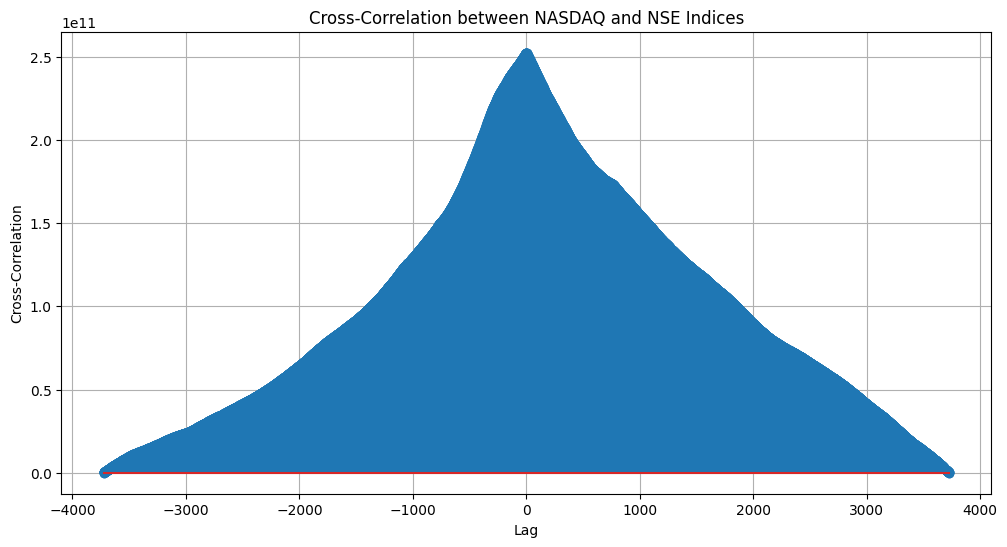

In [16]:
import matplotlib.pyplot as plt

# Align the datasets based on overlapping dates
aligned_nasdaq_data = nasdaq_data.loc[nasdaq_data.index.isin(nse_data.index)]
aligned_nse_data = nse_data.loc[nse_data.index.isin(nasdaq_data.index)]

# Calculate cross-correlation
cross_corr = np.correlate(aligned_nasdaq_data['Close'].values, aligned_nse_data['Close'].values, mode='full')
print(cross_corr.shape)
# Define lags
lags = np.arange(-(len(aligned_nasdaq_data)-1), len(aligned_nasdaq_data))


# Plot cross-correlation
plt.figure(figsize=(12, 6))
plt.stem(lags, cross_corr)
plt.xlabel('Lag')
plt.ylabel('Cross-Correlation')
plt.title('Cross-Correlation between NASDAQ and NSE Indices')
plt.grid(True)
plt.show()

In [17]:
len(nasdaq_data)

5868

In [18]:
np.arange(0, len(nasdaq_data))

array([   0,    1,    2, ..., 5865, 5866, 5867])

In [19]:
len(nse_data)

3826

In [20]:
# Lag with the highest correlation
max_corr_index = np.argmax(np.abs(cross_corr))
max_corr_lag = lags[max_corr_index]

In [21]:
#the leading index
if max_corr_lag > 0:
    leading_index = 'NASDAQ'
else:
    leading_index = 'NSE'

In [22]:
leading_index

'NSE'

# Indicator Coding

## Keltner channel

[*********************100%***********************]  1 of 1 completed


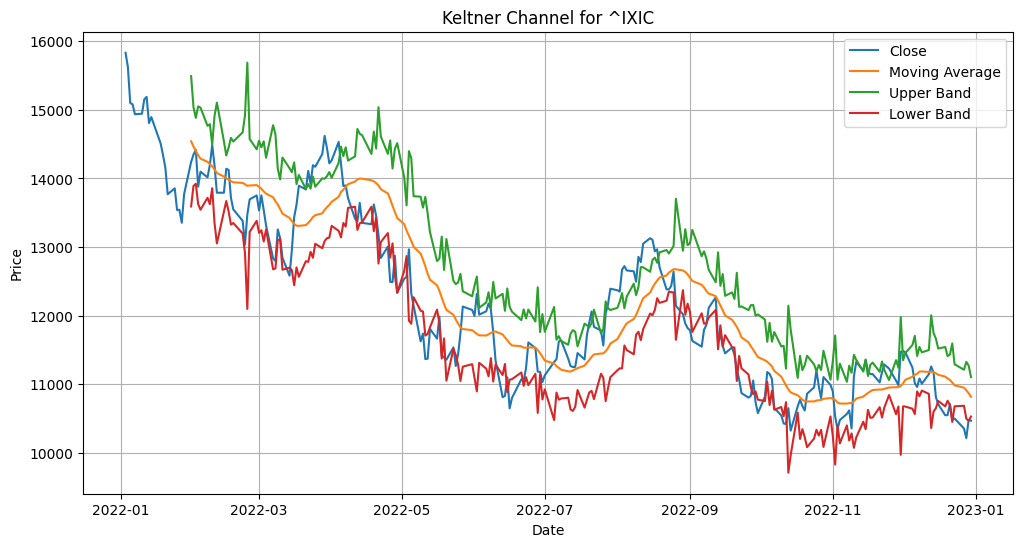

In [44]:

# Define the parameters
period = 20  # Number of periods for the moving average
multiplier = 2  # Multiplier for the ATR

# Download historical data
ticker = "^IXIC"  # Ticker symbol for the stock
data = yf.download(ticker, start="2022-01-01", end="2022-12-31")

# Calculate the Keltner Channel
data['Typical Price'] = (data['High'] + data['Low'] + data['Close']) / 3
data['ATR'] = data['High'] - data['Low']
data['MA'] = data['Typical Price'].rolling(period).mean()
data['Upper Band'] = data['MA'] + multiplier * data['ATR']
data['Lower Band'] = data['MA'] - multiplier * data['ATR']

# Plot the Keltner Channel
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Close')
plt.plot(data['MA'], label='Moving Average')
plt.plot(data['Upper Band'], label='Upper Band')
plt.plot(data['Lower Band'], label='Lower Band')
plt.title('Keltner Channel for {}'.format(ticker))
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


## Bollinger Bands

[*********************100%***********************]  1 of 1 completed


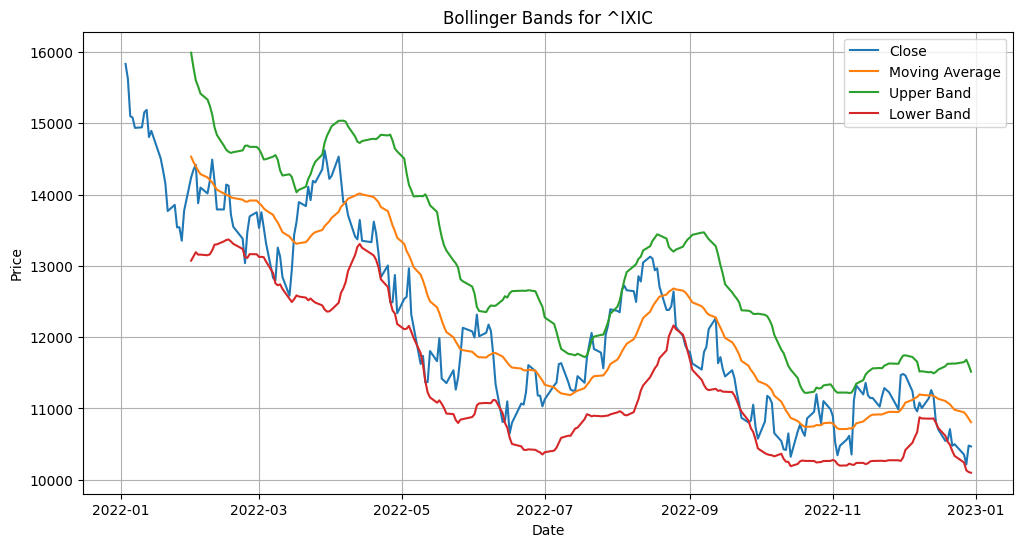

In [45]:

# Define the parameters
period = 20  # Number of periods for the moving average
std_dev = 2  # Number of standard deviations for the bands

# Download historical data
ticker = "^IXIC"  # Ticker symbol for the stock
data = yf.download(ticker, start="2022-01-01", end="2022-12-31")

# Calculate the Bollinger Bands
data['MA'] = data['Close'].rolling(period).mean()
data['Upper Band'] = data['MA'] + std_dev * data['Close'].rolling(period).std()
data['Lower Band'] = data['MA'] - std_dev * data['Close'].rolling(period).std()

# Plot the Bollinger Bands
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Close')
plt.plot(data['MA'], label='Moving Average')
plt.plot(data['Upper Band'], label='Upper Band')
plt.plot(data['Lower Band'], label='Lower Band')
plt.title('Bollinger Bands for {}'.format(ticker))
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


## Moving Average Convergence and Divergence

[*********************100%***********************]  1 of 1 completed


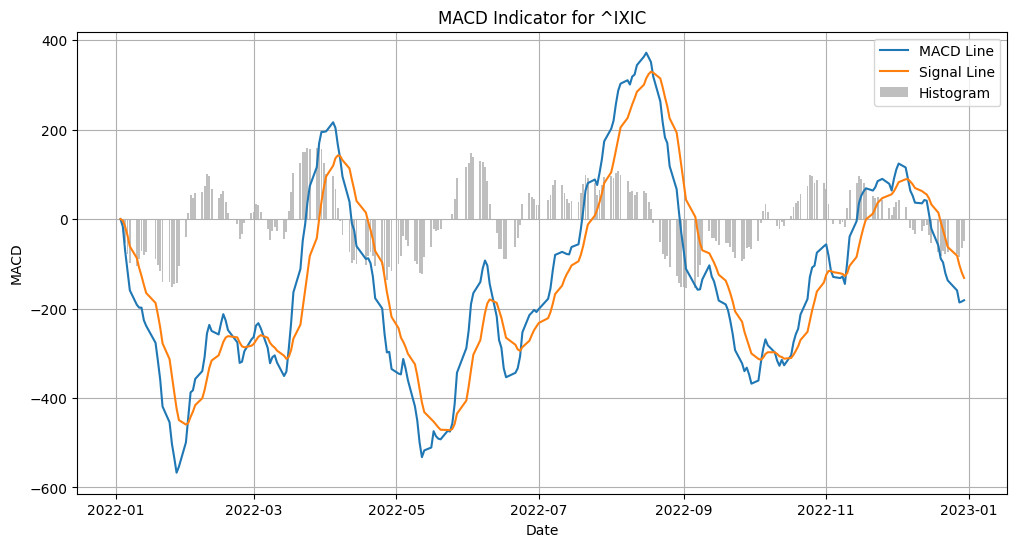

In [46]:

# Download historical data
ticker = "^IXIC"  # Ticker symbol for the stock
data = yf.download(ticker, start="2022-01-01", end="2022-12-31")

# Calculate MACD
data['12-day EMA'] = data['Close'].ewm(span=12, adjust=False).mean()
data['26-day EMA'] = data['Close'].ewm(span=26, adjust=False).mean()
data['MACD Line'] = data['12-day EMA'] - data['26-day EMA']
data['Signal Line'] = data['MACD Line'].ewm(span=9, adjust=False).mean()
data['Histogram'] = data['MACD Line'] - data['Signal Line']

# Plot MACD
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['MACD Line'], label='MACD Line')
plt.plot(data.index, data['Signal Line'], label='Signal Line')
plt.bar(data.index, data['Histogram'], label='Histogram', color='gray', alpha=0.5)
plt.title('MACD Indicator for {}'.format(ticker))
plt.xlabel('Date')
plt.ylabel('MACD')
plt.legend()
plt.grid(True)
plt.show()


# Parameter Optimization

In [26]:
float('-inf')

-inf

In [27]:
#cummulative return metrice
def cummulative_returns(data):
  data_returns=data.pct_change().dropna()
  data_cumulative_returns=(1+data_returns).cumprod()
  return data_cumulative_returns


def max_drawdown(returns):
  cumulative_returns=(1+returns).cumprod()
  peak=cumulative_returns.expanding(min_periods=1).max()
  drawdown=(cumulative_returns/peak)-1
  max_drawdown=drawdown.min()
  return max_drawdown

def sharpe_ratio(returns, risk_free_rate):
  excess_returns=returns-risk_free_rate
  sharpe_ratio=excess_returns.mean()/returns.std()
  return sharpe_ratio

def sortino_ratio(returns, risk_free_rate):
  downside_returns=returns[returns<0]
  sortino_ratios=(returns.mean()-risk_free_rate)/downside_returns.std()
  return sortino_ratios

## Keltner channel optimisation

In [30]:

# parameter ranges to try
period_range = range(10, 31)  # Range for the period parameter
multiplier_range = np.arange(1.0, 3.0, 0.1)  # Range for the multiplier parameter

#  historical data for NASDAQ
ticker = "^IXIC"
data = yf.download(ticker, start="2022-01-01", end="2022-12-31")

# Initialize variables to store the best parameters and best performance
best_period = None
best_multiplier = None
best_cumulative_return = float('-inf')

# Iterate through parameter values and evaluate the Keltner Channel
for period in period_range:
    for multiplier in multiplier_range:
        # Calculate the Keltner Channel
        data['Typical Price'] = (data['High'] + data['Low'] + data['Close']) / 3
        data['ATR'] = data['High'] - data['Low']
        data['MA'] = data['Typical Price'].rolling(period).mean()
        data['Upper Band'] = data['MA'] + multiplier * data['ATR']
        data['Lower Band'] = data['MA'] - multiplier * data['ATR']

        # Generate trading signals based on the Keltner Channel
        data['Signal'] = np.where(data['Close'] > data['Upper Band'], -1, np.where(data['Close'] < data['Lower Band'], 1, 0))

        # Calculate daily returns
        data['Return'] = data['Close'].pct_change()

        # Calculate position returns
        data['Position_Return'] = data['Signal'].shift() * data['Return']

        # Calculate cumulative return
        cumulative_return = (1 + data['Position_Return']).cumprod().iloc[-1]

        # Update the best parameters and best cumulative return if necessary
        if cumulative_return > best_cumulative_return:
            best_period = period
            best_multiplier = multiplier
            best_cumulative_return = cumulative_return

# Print the best parameters and best cumulative return
print("cummulative return :")
print("Best Period:", best_period)
print("Best Multiplier:", best_multiplier)
print("Best Cumulative Return:", best_cumulative_return)


[*********************100%***********************]  1 of 1 completed
cummulative return :
Best Period: 12
Best Multiplier: 1.7000000000000006
Best Cumulative Return: 1.756679852346744


In [31]:

# Define the parameter ranges to try
period_range = range(10, 31)  # Range for the period parameter
multiplier_range = np.arange(1.0, 3.0, 0.1)  # Range for the multiplier parameter

# Download historical data for NASDAQ
ticker = "^IXIC"
data = yf.download(ticker, start="2022-01-01", end="2022-12-31")

# Initialize variables to store the best parameters and best performance
best_period = None
best_multiplier = None
best_sharpe_ratio = float('-inf')

# Iterate through parameter values and evaluate the Keltner Channel
for period in period_range:
    for multiplier in multiplier_range:
        # Calculate the Keltner Channel
        data['Typical Price'] = (data['High'] + data['Low'] + data['Close']) / 3
        data['ATR'] = data['High'] - data['Low']
        data['MA'] = data['Typical Price'].rolling(period).mean()
        data['Upper Band'] = data['MA'] + multiplier * data['ATR']
        data['Lower Band'] = data['MA'] - multiplier * data['ATR']

        # Generate trading signals based on the Keltner Channel
        data['Signal'] = np.where(data['Close'] > data['Upper Band'], -1, np.where(data['Close'] < data['Lower Band'], 1, 0))

        # Calculate daily returns
        data['Return'] = data['Close'].pct_change()

        # Calculate position returns
        data['Position_Return'] = data['Signal'].shift() * data['Return']

        # Calculate the Sharpe ratio
        sharpe_ratio = data['Position_Return'].mean() / data['Position_Return'].std() * np.sqrt(252)  # Assuming 252 trading days in a year

        # Update the best parameters and best Sharpe ratio if necessary
        if sharpe_ratio > best_sharpe_ratio:
            best_period = period
            best_multiplier = multiplier
            best_sharpe_ratio = sharpe_ratio

# Print the best parameters and best Sharpe ratio
print("sharpe ratio :")
print("Best Period:", best_period)
print("Best Multiplier:", best_multiplier)
print("Best Sharpe Ratio:", best_sharpe_ratio)


[*********************100%***********************]  1 of 1 completed
sharpe ratio :
Best Period: 12
Best Multiplier: 1.7000000000000006
Best Sharpe Ratio: 3.240842234495822


In [35]:
import pandas as pd
import yfinance as yf
import numpy as np

# Define the parameter ranges to try
period_range = range(10, 31)  # Range for the period parameter
multiplier_range = np.arange(1.0, 3.0, 0.1)  # Range for the multiplier parameter

# Download historical data for NASDAQ
ticker = "^IXIC"
data = yf.download(ticker, start="2022-01-01", end="2022-12-31")

# Initialize variables to store the best parameters and best performance
best_period = None
best_multiplier = None
best_max_drawdown = float('inf')

# Iterate through parameter values and evaluate the Keltner Channel
for period in period_range:
    for multiplier in multiplier_range:
        # Calculate the Keltner Channel
        data['Typical Price'] = (data['High'] + data['Low'] + data['Close']) / 3
        data['ATR'] = data['High'] - data['Low']
        data['MA'] = data['Typical Price'].rolling(period).mean()
        data['Upper Band'] = data['MA'] + multiplier * data['ATR']
        data['Lower Band'] = data['MA'] - multiplier * data['ATR']

        # Generate trading signals based on the Keltner Channel
        data['Signal'] = np.where(data['Close'] > data['Upper Band'], -1, np.where(data['Close'] < data['Lower Band'], 1, 0))

        # Calculate daily returns
        data['Return'] = data['Close'].pct_change()

        # Calculate position returns
        data['Position_Return'] = data['Signal'].shift() * data['Return']

        # Calculate the cumulative returns
        data['Cumulative_Return'] = (1 + data['Position_Return']).cumprod()

        # Calculate the drawdown
        data['Peak'] = data['Cumulative_Return'].cummax()
        data['Drawdown'] = (data['Cumulative_Return'] / data['Peak']) - 1

        # Calculate the maximum drawdown
        max_drawdown = data['Drawdown'].min()

        # Update the best parameters and best maximum drawdown if necessary
        if max_drawdown < best_max_drawdown:
            best_period = period
            best_multiplier = multiplier
            best_max_drawdown = max_drawdown

# Print the best parameters and best maximum drawdown
print("max drawdown:")
print("Best Period:", best_period)
print("Best Multiplier:", best_multiplier)
print("Best Maximum Drawdown:", best_max_drawdown)


[*********************100%***********************]  1 of 1 completed
max drawdown:
Best Period: 18
Best Multiplier: 1.0
Best Maximum Drawdown: -0.19831301522874145


## Bollinger Bands Optimisation

## using optimised parameter for NSE index


[*********************100%***********************]  1 of 1 completed


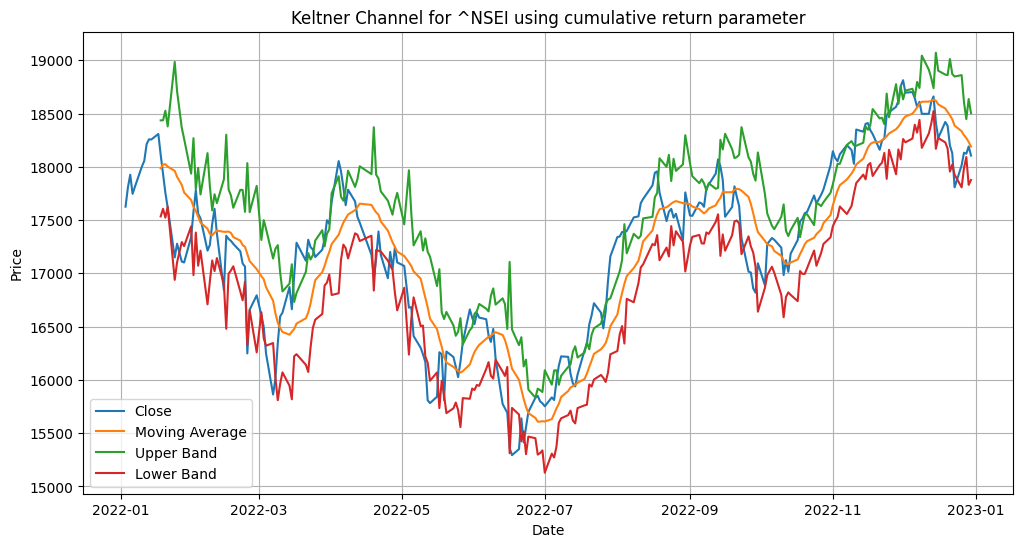

In [38]:

# Define the parameters
period = 12  # Number of periods for the moving average
multiplier = 1.7000000000000006  # Multiplier for the ATR

# Download historical data
ticker = "^NSEI"  # Ticker symbol for the stock
data = yf.download(ticker, start="2022-01-01", end="2022-12-31")

# Calculate the Keltner Channel
data['Typical Price'] = (data['High'] + data['Low'] + data['Close']) / 3
data['ATR'] = data['High'] - data['Low']
data['MA'] = data['Typical Price'].rolling(period).mean()
data['Upper Band'] = data['MA'] + multiplier * data['ATR']
data['Lower Band'] = data['MA'] - multiplier * data['ATR']

# Plot the Keltner Channel
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Close')
plt.plot(data['MA'], label='Moving Average')
plt.plot(data['Upper Band'], label='Upper Band')
plt.plot(data['Lower Band'], label='Lower Band')
plt.title('Keltner Channel for {} using cumulative return parameter'.format(ticker))
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


In [39]:
# for sharpe ratio parameter value is same so same above graph

[*********************100%***********************]  1 of 1 completed


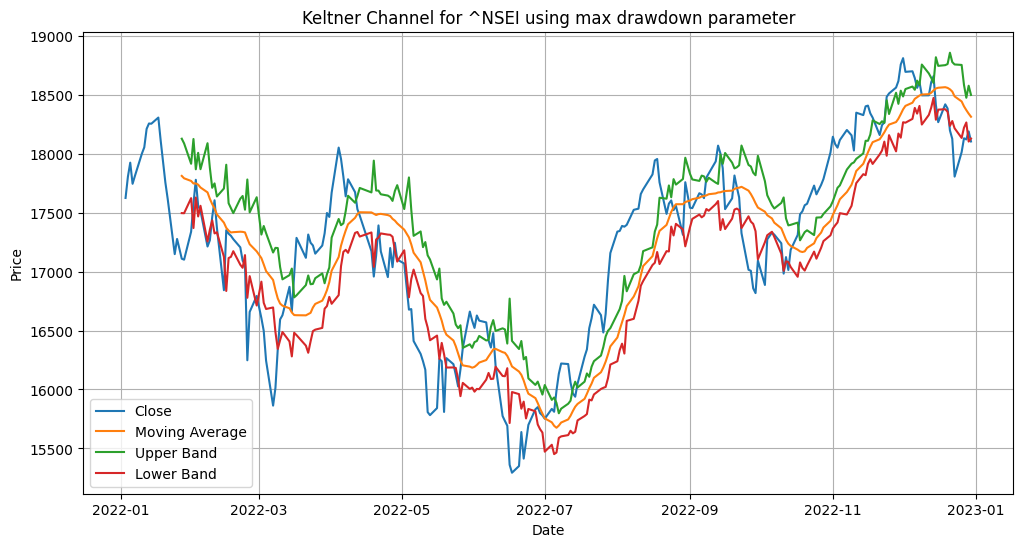

In [41]:
# Define the parameters
period = 18  # Number of periods for the moving average
multiplier = 1.0  # Multiplier for the ATR

# Download historical data
ticker = "^NSEI"  # Ticker symbol for the stock
data = yf.download(ticker, start="2022-01-01", end="2022-12-31")

# Calculate the Keltner Channel
data['Typical Price'] = (data['High'] + data['Low'] + data['Close']) / 3
data['ATR'] = data['High'] - data['Low']
data['MA'] = data['Typical Price'].rolling(period).mean()
data['Upper Band'] = data['MA'] + multiplier * data['ATR']
data['Lower Band'] = data['MA'] - multiplier * data['ATR']

# Plot the Keltner Channel
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Close')
plt.plot(data['MA'], label='Moving Average')
plt.plot(data['Upper Band'], label='Upper Band')
plt.plot(data['Lower Band'], label='Lower Band')
plt.title('Keltner Channel for {} using max drawdown parameter'.format(ticker))
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


## Buy and Sell signal

[*********************100%***********************]  1 of 1 completed


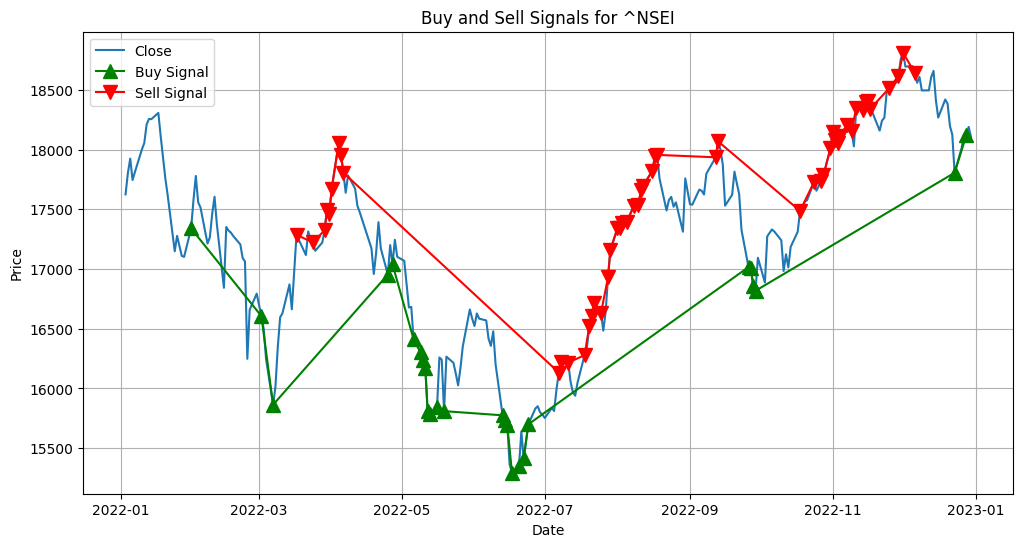

In [34]:
import pandas as pd
import yfinance as yf
import numpy as np

# Define the parameters
period = 20  # Number of periods for the moving average
multiplier = 2.5  # Multiplier for the ATR

# Download historical data for the NSE index
ticker = "^NSEI"
data = yf.download(ticker, start="2022-01-01", end="2022-12-31")

# Calculate the Keltner Channel
data['Typical Price'] = (data['High'] + data['Low'] + data['Close']) / 3
data['ATR'] = data['High'] - data['Low']
data['MA'] = data['Typical Price'].rolling(period).mean()
data['Upper Band'] = data['MA'] + multiplier * data['ATR']
data['Lower Band'] = data['MA'] - multiplier * data['ATR']

# Generate the buy and sell signals
data['Signal'] = np.where(data['Close'] > data['Upper Band'], -1, np.where(data['Close'] < data['Lower Band'], 1, 0))

# Plot the buy and sell signals
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Close')
plt.plot(data[data['Signal'] == 1]['Close'], marker='^', markersize=10, color='green', label='Buy Signal')
plt.plot(data[data['Signal'] == -1]['Close'], marker='v', markersize=10, color='red', label='Sell Signal')
plt.title('Buy and Sell Signals for {}'.format(ticker))
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


## record of signal and dates

In [42]:
import pandas as pd
import yfinance as yf
import numpy as np

# Define the parameters
period = 20  # Number of periods for the moving average
multiplier = 2.5  # Multiplier for the ATR

# Download historical data for the NSE index
ticker = "^NSEI"
data = yf.download(ticker, start="2022-01-01", end="2022-12-31")

# Calculate the Keltner Channel
data['Typical Price'] = (data['High'] + data['Low'] + data['Close']) / 3
data['ATR'] = data['High'] - data['Low']
data['MA'] = data['Typical Price'].rolling(period).mean()
data['Upper Band'] = data['MA'] + multiplier * data['ATR']
data['Lower Band'] = data['MA'] - multiplier * data['ATR']

# Generate the buy and sell signals
data['Signal'] = np.where(data['Close'] > data['Upper Band'], -1, np.where(data['Close'] < data['Lower Band'], 1, 0))

# Calculate the daily returns
data['Return'] = data['Close'].pct_change()

# Calculate the position returns
data['Position_Return'] = data['Signal'].shift() * data['Return']

# Calculate the cumulative returns
data['Cumulative_Return'] = (1 + data['Position_Return']).cumprod()

# Record the signals, dates, and returns
signals = data[data['Signal'] != 0]['Signal']
signal_dates = signals.index
returns = data[data['Signal'] != 0]['Position_Return']

# Print the recorded signals, dates, returns, and metrics
print("Buy/Sell Signals:")
print(signals)
print("\nSignal Dates:")
print(signal_dates)
print("\nReturns:")
print(returns)



[*********************100%***********************]  1 of 1 completed
Buy/Sell Signals:
Date
2022-01-31    1
2022-03-02    1
2022-03-07    1
2022-03-17   -1
2022-03-24   -1
             ..
2022-11-29   -1
2022-12-01   -1
2022-12-06   -1
2022-12-23    1
2022-12-28    1
Name: Signal, Length: 78, dtype: int64

Signal Dates:
DatetimeIndex(['2022-01-31', '2022-03-02', '2022-03-07', '2022-03-17',
               '2022-03-24', '2022-03-29', '2022-03-30', '2022-03-31',
               '2022-04-01', '2022-04-04', '2022-04-05', '2022-04-06',
               '2022-04-25', '2022-04-27', '2022-05-06', '2022-05-09',
               '2022-05-10', '2022-05-11', '2022-05-12', '2022-05-13',
               '2022-05-16', '2022-05-19', '2022-06-13', '2022-06-14',
               '2022-06-15', '2022-06-17', '2022-06-20', '2022-06-22',
               '2022-06-24', '2022-07-07', '2022-07-08', '2022-07-11',
               '2022-07-18', '2022-07-20', '2022-07-21', '2022-07-22',
               '2022-07-25', '2022-07-2